In [47]:
import pymatgen as mg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import os
import time
from pymatgen.ext.matproj import MPRester
from util_misc import nested_dict_lookup
from calc_chemfeat_2 import MatProjCalc, Perovskite
from calc_chemfeat import matproj_calc 

%load_ext autoreload
%autoreload 2

from matminer.featurizers.conversions import StrToComposition, CompositionToOxidComposition
from matminer.featurizers.composition import ElementProperty, ValenceOrbital, OxidationStates, AtomicOrbitals, IonProperty, \
    ElectronAffinity, Stoichiometry, ElementFraction, TMetalFraction, CohesiveEnergy
from matminer.utils.data import CohesiveEnergyData, DemlData, MagpieData, PymatgenData

import mendeleev as mdl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
mdl.element('Co').lattice_constant

2.51

In [51]:
mdl.element('Co').bulk_modulus

AttributeError: 'Element' object has no attribute 'bulk_modulus'

# Matminer

## data sources

In [ ]:
magpie = MagpieData()

elements = list(magpie.all_elemental_props['AllenElectronegativity'].keys())

In [84]:
def get_class(el):
    if magpie.all_elemental_props['IsMetal'][el] == 1:
        return 'metal'
    if magpie.all_elemental_props['IsMetalloid'][el] == 1:
        return 'metalloid'
    if magpie.all_elemental_props['IsNonmetal'][el] == 1:
        return 'nonmetal'
    
    
lat_const = [mdl.element(el).lattice_constant for el in elements]
atomic_rad = [mdl.element(el).atomic_radius for el in elements]
struct = [mdl.element(el).lattice_structure for el in elements]
el_class = [get_class(el) for el in elements]
number = [mdl.element(el).atomic_number for el in elements]



In [83]:
mdl.element('C')


Element(
	abundance_crust=200.0,
 	abundance_sea=28.0,
 	annotation='density(graphite), ',
 	atomic_number=6,
 	atomic_radius=91.0,
 	atomic_radius_rahm=190.0,
 	atomic_volume=5.3,
 	atomic_weight=12.011,
 	atomic_weight_uncertainty=None,
 	block='p',
 	boiling_point=5100.0,
 	c6=46.6,
 	c6_gb=47.9,
 	cas='7440-44-0',
 	covalent_radius_bragg=77.0,
 	covalent_radius_cordero=73.0,
 	covalent_radius_pyykko=75.0,
 	covalent_radius_pyykko_double=67.0,
 	covalent_radius_pyykko_triple=60.0,
 	covalent_radius_slater=70.0,
 	cpk_color='#c8c8c8',
 	density=2.25,
 	description='Carbon is a member of group 14 of the periodic table. It has three allotropic forms of it, diamonds, graphite and fullerite. Carbon-14 is commonly used in radioactive dating. Carbon occurs in all organic life and is the basis of organic chemistry. Carbon has the interesting chemical property of being able to bond with itself, and a wide variety of other elements.',
 	dipole_polarizability=20.53,
 	discoverers='Known to the

In [80]:
class_map = {'metal':0,'metalloid':1,'nonmetal':2}
colors = [class_map[c] for c in el_class]

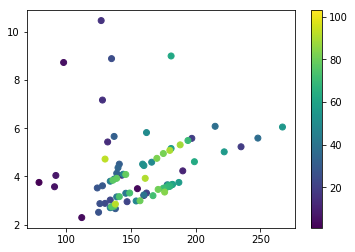

In [85]:
plt.scatter(atomic_rad, lat_const,c=number)
plt.colorbar()

In [43]:
MagpieData().all_elemental_props['GSenergy_pa']

{'Ac': -4.1050022975,
 'Ag': -2.76539356,
 'Al': -3.74542312,
 'Am': -14.326634305,
 'Ar': 0.05854104,
 'As': -4.650889115,
 'At': -4.03934834875,
 'Au': -3.20969261,
 'B': -6.67769815417,
 'Ba': -1.92352226,
 'Be': -3.755038695,
 'Bi': -3.9736944,
 'Bk': -14.326634305,
 'Br': -1.5830253375,
 'C': -9.209713655,
 'Ca': -1.948329565,
 'Cd': -0.812174225,
 'Ce': -4.77656965,
 'Cf': -14.326634305,
 'Cl': -1.784433755,
 'Cm': -14.326634305,
 'Co': -7.080389145,
 'Cr': -9.50571654,
 'Cs': -0.85462646,
 'Cu': -3.68065482,
 'Dy': -4.60155445333,
 'Er': -4.563633745,
 'Es': -14.326634305,
 'Eu': -1.82958684,
 'F': -1.6980609575,
 'Fe': -8.28548436,
 'Fm': -14.326634305,
 'Fr': -4.03934834875,
 'Ga': -3.0122553025,
 'Gd': -4.65442131,
 'Ge': -4.616039545,
 'H': -3.331290765,
 'He': 0.0011354,
 'Hf': -9.954299335,
 'Hg': -0.250105562414,
 'Ho': -4.57741687667,
 'I': -1.5054024175,
 'In': -2.66680196,
 'Ir': -8.84851145,
 'K': -1.09753971333,
 'Kr': 0.08753524,
 'La': -4.927546185,
 'Li': -1.86988

In [16]:
MagpieData().all_elemental_props.keys()

dict_keys(['AllenElectronegativity', 'AtomicRadius', 'AtomicVolume', 'AtomicWeight', 'BoilingT', 'BulkModulus', 'Column', 'CovalentRadius', 'Density', 'DipolePolarizability', 'ElectronAffinity', 'Electronegativity', 'FirstIonizationEnergy', 'FusionEnthalpy', 'GSbandgap', 'GSenergy_pa', 'GSestBCClatcnt', 'GSestFCClatcnt', 'GSmagmom', 'GSvolume_pa', 'HeatCapacityMass', 'HeatCapacityMolar', 'HeatFusion', 'HeatVaporization', 'HHIp', 'HHIr', 'ICSDVolume', 'IonizationEnergies', 'IsAlkali', 'IsDBlock', 'IsFBlock', 'IsMetal', 'IsMetalloid', 'IsNonmetal', 'LogThermalConductivity', 'MeltingT', 'MendeleevNumber', 'MiracleRadius', 'MolarVolume', 'NdUnfilled', 'NdValence', 'NfUnfilled', 'NfValence', 'NpUnfilled', 'NpValence', 'NsUnfilled', 'NsValence', 'Number', 'NUnfilled', 'NValence', 'n_ws^third', 'OxidationStates', 'phi', 'Polarizability', 'Row', 'SecondIonizationEnergy', 'ShearModulus', 'SpaceGroupNumber', 'ThermalConductivity', 'VdWRadius', 'ZungerPP-r_d', 'ZungerPP-r_p', 'ZungerPP-r_pi', 'Zu

In [96]:
elemental_properties = ['BoilingT', 'MeltingT',
            'BulkModulus', 'ShearModulus', 
            'Row', 'Column', 'Number', 'MendeleevNumber', 'SpaceGroupNumber',
            'Density','MolarVolume',
            'FusionEnthalpy','HeatVaporization',
            'NsUnfilled','NpUnfilled','NdUnfilled','NfUnfilled',
            'Polarizability', 
            'ThermalConductivity']

elemental_property_label_map = {'BoilingT':'boil_temp','MeltingT':'melt_temp',
                        'BulkModulus':'bulk_mod','ShearModulus':'shear_mod',
                           'Row':'row','Column':'column','Number':'number','MendeleevNumber':'mendeleev','SpaceGroupNumber':'space_group',
                            'Density':'density','MolarVolume':'molar_vol',
                            'FusionEnthalpy':'H_fus','HeatVaporization':'H_vap',
                            'NsUnfilled':'valence_unfilled_s','NpUnfilled':'valence_unfilled_p','NdUnfilled':'valence_unfilled_d','NfUnfilled':'valence_unfilled_f',
                            'Polarizability':'polarizability',
                            'ThermalConductivity':'sigma_therm'}
                           }

ep_feat = ElementProperty(data_source='magpie',features=elemental_properties,
                          stats=["mean"])#, "std_dev", "range"])

In [58]:
ep_df = ep_feat.featurize_dataframe(df,col_id="composition",inplace=False)
ep_df.columns

HBox(children=(IntProgress(value=0, description='ElementProperty', max=5), HTML(value='')))

Index(['formula', 'composition', 'mean BoilingT', 'mean MeltingT',
       'mean BulkModulus', 'mean ShearModulus', 'mean Row', 'mean Column',
       'mean Number', 'mean MendeleevNumber', 'mean SpaceGroupNumber',
       'mean Density', 'mean MolarVolume', 'mean FusionEnthalpy',
       'mean HeatVaporization', 'mean NsUnfilled', 'mean NpUnfilled',
       'mean NdUnfilled', 'mean NfUnfilled', 'mean Polarizability',
       'mean ThermalConductivity'],
      dtype='object')

In [98]:
elemental_property_labels = list(map(elemental_property_label_map.get,elemental_properties))

In [99]:
[feat_label.replace(prop,prop_lab) for feat_label, prop, prop_lab in zip(ep_feat.feature_labels(),elemental_properties,elemental_property_labels)]

['mean boil_temp',
 'mean melt_temp',
 'mean bulk_mod',
 'mean shear_mod',
 'mean row',
 'mean column',
 'mean number',
 'mean mendeleev',
 'mean space_group',
 'mean density',
 'mean molar_vol',
 'mean H_fus',
 'mean H_vap',
 'mean valence_unfilled_s',
 'mean valence_unfilled_p',
 'mean valence_unfilled_d',
 'mean valence_unfilled_f',
 'mean polarizability',
 'mean sigma_therm']

In [100]:
ep_feat.features

['BoilingT',
 'MeltingT',
 'BulkModulus',
 'ShearModulus',
 'Row',
 'Column',
 'Number',
 'MendeleevNumber',
 'SpaceGroupNumber',
 'Density',
 'MolarVolume',
 'FusionEnthalpy',
 'HeatVaporization',
 'NsUnfilled',
 'NpUnfilled',
 'NdUnfilled',
 'NfUnfilled',
 'Polarizability',
 'ThermalConductivity']

## Test composition featurizers

In [23]:
CohesiveEnergyData().get_elemental_property('O')*6.022e23*1.6e-19

250515.2

In [281]:
comp = mg.Composition('BaCo0.4Fe0.4Zr0.1Y0.1O3')
help(comp)

Help on Composition in module pymatgen.core.composition object:

class Composition(collections.abc.Hashable, collections.abc.Mapping, monty.json.MSONable)
 |  Represents a Composition, which is essentially a {element:amount} mapping
 |  type. Composition is written to be immutable and hashable,
 |  unlike a standard Python dict.
 |  
 |  Note that the key can be either an Element or a Specie. Elements and Specie
 |  are treated differently. i.e., a Fe2+ is not the same as a Fe3+ Specie and
 |  would be put in separate keys. This differentiation is deliberate to
 |  support using Composition to determine the fraction of a particular Specie.
 |  
 |  Works almost completely like a standard python dictionary, except that
 |  __getitem__ is overridden to return 0 when an element is not found.
 |  (somewhat like a defaultdict, except it is immutable).
 |  
 |  Also adds more convenience methods relevant to compositions, e.g.,
 |  get_fraction.
 |  
 |  It should also be noted that many Comp

In [2]:
formulas = ['BaCo0.4Fe0.4Zr0.1Y0.1O3',
            'BaCo0.3Fe0.5Zr0.1Y0.1O3',
            'BaCo0.5Fe0.3Zr0.1Y0.1O3',
            'BaCo0.1Fe0.1Zr0.7Y0.1O3',
            'BaCo0.1Fe0.1Zr0.1Y0.7O3']

#some featurizers require integer formulas
int_formulas = [mg.Composition(f).get_integer_formula_and_factor()[0] for f in formulas]

df = pd.DataFrame(formulas,columns=['formula'])
int_df =pd.DataFrame(int_formulas,columns=['formula'])

stc = StrToComposition()
stc.featurize_dataframe(df,col_id='formula')
stc.featurize_dataframe(int_df,col_id='formula')
# oc = CompositionToOxidComposition().featurize(mg.Composition("Ba10Co4Fe4Zr2O30"))
# os_feat = OxidationStates()
# os_feat.featurize(oc[0])

HBox(children=(IntProgress(value=0, description='StrToComposition', max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, description='StrToComposition', max=5), HTML(value='')))

,formula,composition
0,Ba10YZrFe4(Co2O15)2,"(Ba, Y, Zr, Fe, Co, O)"
1,Ba10YZrFe5(CoO10)3,"(Ba, Y, Zr, Fe, Co, O)"
2,Ba10YZrFe3(CoO6)5,"(Ba, Y, Zr, Fe, Co, O)"
3,Ba10YZr7FeCoO30,"(Ba, Y, Zr, Fe, Co, O)"
4,Ba10Y7ZrFeCoO30,"(Ba, Y, Zr, Fe, Co, O)"


In [32]:
df

,formula,composition
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)"
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)"
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)"
3,BaCo0.1Fe0.1Zr0.7Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)"
4,BaCo0.1Fe0.1Zr0.1Y0.7O3,"(Ba, Co, Fe, Zr, Y, O)"


In [38]:
"OxidationStates"
oc_df = CompositionToOxidComposition().featurize_dataframe(int_df,col_id="composition",inplace=False)

os_feat = OxidationStates()
os_df = os_feat.featurize_dataframe(oc_df,col_id="composition_oxid",inplace=False)
os_df

HBox(children=(IntProgress(value=0, description='CompositionToOxidComposition', max=5), HTML(value='')))

HBox(children=(IntProgress(value=0, description='OxidationStates', max=5), HTML(value='')))

,formula,composition,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,Ba10YZrFe4(Co2O15)2,"(Ba, Y, Zr, Fe, Co, O)","(Ba0+, Y0+, Zr0+, Fe0+, Co0+, O0+)",0,0,0,0.0
1,Ba10YZrFe5(CoO10)3,"(Ba, Y, Zr, Fe, Co, O)","(Ba0+, Y0+, Zr0+, Fe0+, Co0+, O0+)",0,0,0,0.0
2,Ba10YZrFe3(CoO6)5,"(Ba, Y, Zr, Fe, Co, O)","(Ba0+, Y0+, Zr0+, Fe0+, Co0+, O0+)",0,0,0,0.0
3,Ba10YZr7FeCoO30,"(Ba, Y, Zr, Fe, Co, O)","(Ba0+, Y0+, Zr0+, Fe0+, Co0+, O0+)",0,0,0,0.0
4,Ba10Y7ZrFeCoO30,"(Ba, Y, Zr, Fe, Co, O)","(Ba0+, Y0+, Zr0+, Fe0+, Co0+, O0+)",0,0,0,0.0


In [3]:
"ElementProperty"
ep_feat = ElementProperty.from_preset('magpie')
#ep_df = ep_feat.featurize_dataframe(df,col_id='composition',inplace=False)
ep_feat.feature_labels()

['minimum Number',
 'maximum Number',
 'range Number',
 'mean Number',
 'avg_dev Number',
 'mode Number',
 'minimum MendeleevNumber',
 'maximum MendeleevNumber',
 'range MendeleevNumber',
 'mean MendeleevNumber',
 'avg_dev MendeleevNumber',
 'mode MendeleevNumber',
 'minimum AtomicWeight',
 'maximum AtomicWeight',
 'range AtomicWeight',
 'mean AtomicWeight',
 'avg_dev AtomicWeight',
 'mode AtomicWeight',
 'minimum MeltingT',
 'maximum MeltingT',
 'range MeltingT',
 'mean MeltingT',
 'avg_dev MeltingT',
 'mode MeltingT',
 'minimum Column',
 'maximum Column',
 'range Column',
 'mean Column',
 'avg_dev Column',
 'mode Column',
 'minimum Row',
 'maximum Row',
 'range Row',
 'mean Row',
 'avg_dev Row',
 'mode Row',
 'minimum CovalentRadius',
 'maximum CovalentRadius',
 'range CovalentRadius',
 'mean CovalentRadius',
 'avg_dev CovalentRadius',
 'mode CovalentRadius',
 'minimum Electronegativity',
 'maximum Electronegativity',
 'range Electronegativity',
 'mean Electronegativity',
 'avg_dev E

In [35]:
"ValenceOrbital"
vo_feat = ValenceOrbital()
vo_df = vo_feat.featurize_dataframe(df,col_id="composition",inplace=False)
vo_df

HBox(children=(IntProgress(value=0, description='ValenceOrbital', max=5), HTML(value='')))

,formula,composition,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",2.0,2.4,1.10,0.0,0.363636,0.436364,0.200000,0.0
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",2.0,2.4,1.08,0.0,0.364964,0.437956,0.197080,0.0
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",2.0,2.4,1.12,0.0,0.362319,0.434783,0.202899,0.0
3,BaCo0.1Fe0.1Zr0.7Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",2.0,2.4,0.56,0.0,0.403226,0.483871,0.112903,0.0
4,BaCo0.1Fe0.1Zr0.1Y0.7O3,"(Ba, Co, Fe, Zr, Y, O)",2.0,2.4,0.44,0.0,0.413223,0.495868,0.090909,0.0


In [108]:
ce_feat.featurize(mg.Composition('BaO'),formation_energy_per_atom=1e-10)

[2.2499999999]

In [39]:
"IonProperty"
ip_feat = IonProperty()
ip_df = ip_feat.featurize_dataframe(int_df,col_id="composition",inplace=False)
ip_df

HBox(children=(IntProgress(value=0, description='IonProperty', max=5), HTML(value='')))

,formula,composition,compound possible,max ionic char,avg ionic char
0,Ba10YZrFe4(Co2O15)2,"(Ba, Y, Zr, Fe, Co, O)",False,0.803211,0.165183
1,Ba10YZrFe5(CoO10)3,"(Ba, Y, Zr, Fe, Co, O)",False,0.803211,0.165349
2,Ba10YZrFe3(CoO6)5,"(Ba, Y, Zr, Fe, Co, O)",False,0.803211,0.165016
3,Ba10YZr7FeCoO30,"(Ba, Y, Zr, Fe, Co, O)",False,0.803211,0.176030
4,Ba10Y7ZrFeCoO30,"(Ba, Y, Zr, Fe, Co, O)",False,0.803211,0.178337


In [40]:
"ElectronAffinity"
ea_feat = ElectronAffinity()
ea_df = ea_feat.featurize_dataframe(oc_df,col_id="composition_oxid",inplace=False)
ea_df
#ElectronAffinity seems to require non-zero oxidation states to be assigned. 
#pymatgen can't figure out what oxidation states to assign to BCFZY, so this doesn't work
#However, composition doesn't seem to impact estimated electron affinity of oxygen (see test below), so likely irrelevant anyway
"Test on simpler compounds"
# fm = ['BaO','CeO2','H2O','Li2O']
# comps = [mg.Composition(f) for f in fm]
# comps = [c.add_charges_from_oxi_state_guesses() for c  in comps]
# ea_feat.featurize_many(comps)

HBox(children=(IntProgress(value=0, description='ElectronAffinity', max=5), HTML(value='')))

ValueError: not enough values to unpack (expected 2, got 0)
To skip errors when featurizing specific compounds, consider running the batch featurize() operation (e.g., featurize_many(), featurize_dataframe(), etc.) with ignore_errors=True

In [41]:
"Stoichiometry"
st_feat = Stoichiometry()
st_df = st_feat.featurize_dataframe(df,col_id="composition",inplace=False)
st_df

HBox(children=(IntProgress(value=0, description='Stoichiometry', max=5), HTML(value='')))

,formula,composition,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",6,0.643117,0.608256,0.600503,0.600039,0.600001
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",6,0.643739,0.608429,0.600510,0.600039,0.600001
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",6,0.643739,0.608429,0.600510,0.600039,0.600001
3,BaCo0.1Fe0.1Zr0.7Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",6,0.648691,0.609809,0.600576,0.600042,0.600001
4,BaCo0.1Fe0.1Zr0.1Y0.7O3,"(Ba, Co, Fe, Zr, Y, O)",6,0.648691,0.609809,0.600576,0.600042,0.600001


In [42]:
"ElementFraction"
ef_feat = ElementFraction()
ef_df = ef_feat.featurize_dataframe(df,col_id="composition",inplace=False)
ef_df.loc[:,['formula','composition','Ba','Co','Fe','Zr','Y','O']]

HBox(children=(IntProgress(value=0, description='ElementFraction', max=5), HTML(value='')))

,formula,composition,Ba,Co,Fe,Zr,Y,O
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",0.2,0.08,0.08,0.02,0.02,0.6
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",0.2,0.06,0.10,0.02,0.02,0.6
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",0.2,0.10,0.06,0.02,0.02,0.6
3,BaCo0.1Fe0.1Zr0.7Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",0.2,0.02,0.02,0.14,0.02,0.6
4,BaCo0.1Fe0.1Zr0.1Y0.7O3,"(Ba, Co, Fe, Zr, Y, O)",0.2,0.02,0.02,0.02,0.14,0.6


In [43]:
"TMetalFraction"
tm_feat = TMetalFraction()
tm_df = tm_feat.featurize_dataframe(df,col_id="composition",inplace=False)
tm_df

HBox(children=(IntProgress(value=0, description='TMetalFraction', max=5), HTML(value='')))

,formula,composition,transition metal fraction
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",0.16
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",0.16
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",0.16
3,BaCo0.1Fe0.1Zr0.7Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",0.04
4,BaCo0.1Fe0.1Zr0.1Y0.7O3,"(Ba, Co, Fe, Zr, Y, O)",0.04


In [45]:
"CohesiveEnergy"
ce_feat = CohesiveEnergy(mapi_key=os.environ['MATPROJ_API_KEY'])
ce_df = df.copy()
"May be able to estimate formation energy using similar approach to Sammels eqn for MO_ABE"
ce_df['formation_energy_per_atom'] = 1e-10 #if 0, treated as None and ce_feat tries to query matProj for BCFZY formation energy
ce_df = ce_feat.featurize_dataframe(ce_df,col_id=["composition",'formation_energy_per_atom'],inplace=False)
ce_df

HBox(children=(IntProgress(value=0, description='CohesiveEnergy', max=5), HTML(value='')))

,formula,composition,formation_energy_per_atom,cohesive energy
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",1.000000e-10,2.8460
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",1.000000e-10,2.8438
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",1.000000e-10,2.8482
3,BaCo0.1Fe0.1Zr0.7Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",1.000000e-10,3.0758
4,BaCo0.1Fe0.1Zr0.1Y0.7O3,"(Ba, Co, Fe, Zr, Y, O)",1.000000e-10,2.8502


In [46]:
#check on what CohesiveEnergy is doing
#simply gets average elemental cohesive energy per atom and subtracts formation_energy_per_atom
ced = CohesiveEnergyData()

formulas = ['BaCo0.4Fe0.4Zr0.1Y0.1O3',
            'BaCo0.3Fe0.5Zr0.1Y0.1O3',
            'BaCo0.5Fe0.3Zr0.1Y0.1O3',
            'BaCo0.1Fe0.1Zr0.7Y0.1O3',
            'BaCo0.1Fe0.1Zr0.1Y0.7O3']

for form in formulas:
    f = mg.Composition(form)
    ce = 0
    for k,v in f.get_el_amt_dict().items():
        ce += ced.get_elemental_property(k)*v
    print(form,ce/5)

BaCo0.4Fe0.4Zr0.1Y0.1O3 2.846
BaCo0.3Fe0.5Zr0.1Y0.1O3 2.8438000000000003
BaCo0.5Fe0.3Zr0.1Y0.1O3 2.8482
BaCo0.1Fe0.1Zr0.7Y0.1O3 3.0758
BaCo0.1Fe0.1Zr0.1Y0.7O3 2.8502


In [33]:
"AtomicOrbitals"
ao_feat = AtomicOrbitals()
ao_df = ao_feat.featurize_dataframe(df,col_id="composition",inplace=False)
ao_df

HBox(children=(IntProgress(value=0, description='AtomicOrbitals', max=5), HTML(value='')))

,formula,composition,HOMO_character,HOMO_element,HOMO_energy,LUMO_character,LUMO_element,LUMO_energy,gap_AO
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",d,Co,-0.322368,d,Co,-0.322368,0.0
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",d,Fe,-0.295049,d,Fe,-0.295049,0.0
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",d,Co,-0.322368,d,Co,-0.322368,0.0
3,BaCo0.1Fe0.1Zr0.7Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",d,Co,-0.322368,d,Co,-0.322368,0.0
4,BaCo0.1Fe0.1Zr0.1Y0.7O3,"(Ba, Co, Fe, Zr, Y, O)",d,Co,-0.322368,d,Co,-0.322368,0.0


In [65]:
"check on what AtomicOrbitals is doing"
f = 'BaZrO3'
f = mg.Composition(f).get_integer_formula_and_factor()[0]

#uses MolecularOrbitals.obtain_band_edges to estimate HOMO and LUMO
#this gets all the atomic orbitals of the constituents, and fills them in with e- from lowest energy to highest
#highest occupied atomic orbital becomes HOMO, lowest unoccupied AO becomes LUMO. 
#If HOMO is partially filled, HOMO=LUMO, and bandgap=0
#see http://pymatgen.org/_modules/pymatgen/core/molecular_orbitals.html
mo = mg.core.molecular_orbitals.MolecularOrbitals(f)
mo.obtain_band_edges(),mo.aos_as_list()

({'HOMO': ['O', '2p', -0.338381],
  'LUMO': ['Zr', '5s', -0.162391],
  'metal': False},
 [['Ba', '1s', -1305.743258],
  ['Zr', '1s', -639.292236],
  ['Ba', '2s', -200.844444],
  ['Ba', '2p', -189.598483],
  ['Zr', '2s', -87.237062],
  ['Zr', '2p', -80.010043],
  ['Ba', '3s', -42.359434],
  ['Ba', '3p', -37.536931],
  ['Ba', '3d', -28.528933],
  ['O', '1s', -18.758245],
  ['O', '1s', -18.758245],
  ['O', '1s', -18.758245],
  ['Zr', '3s', -14.230432],
  ['Zr', '3p', -11.514415],
  ['Ba', '4s', -8.257061],
  ['Zr', '3d', -6.544643],
  ['Ba', '4p', -6.497622],
  ['Ba', '4d', -3.432441],
  ['Zr', '4s', -1.918971],
  ['Zr', '4p', -1.186597],
  ['Ba', '5s', -1.157159],
  ['O', '2s', -0.871362],
  ['O', '2s', -0.871362],
  ['O', '2s', -0.871362],
  ['Ba', '5p', -0.698605],
  ['O', '2p', -0.338381],
  ['O', '2p', -0.338381],
  ['O', '2p', -0.338381],
  ['Zr', '5s', -0.162391],
  ['Zr', '4d', -0.150673],
  ['Ba', '6s', -0.118967]])

In [48]:
#check on what AtomicOrbitals is doing
formulas = ['BaO','CoO','Co3O4','Fe2O3','Fe3O4','ZrO2','Y2O3','CeO2','KI','SiO2','SiO']

test_df = pd.DataFrame(formulas,columns=['formula'])
stc = StrToComposition()
stc.featurize_dataframe(test_df,col_id='formula')
ao_feat.featurize_dataframe(test_df,col_id="composition")

#reproduce AtomicOrbitals features manually
test_df['HOMO_energy_manual'] = 0
test_df['LUMO_energy_manual'] = 0

for idx in test_df.index:
    comp = test_df.loc[idx,'composition']
    HOAO
    
    test_df.loc[idx,'HOMO_energy_manual'] = max(HOAO_energy())

HBox(children=(IntProgress(value=0, description='StrToComposition', max=11), HTML(value='')))

HBox(children=(IntProgress(value=0, description='AtomicOrbitals', max=11), HTML(value='')))

,formula,composition,HOMO_character,HOMO_element,HOMO_energy,LUMO_character,LUMO_element,LUMO_energy,gap_AO
0,BaO,"(Ba, O)",p,O,-0.338381,s,Ba,-0.118967,0.219414
1,CoO,"(Co, O)",d,Co,-0.322368,d,Co,-0.322368,0.000000
2,Co3O4,"(Co, O)",d,Co,-0.322368,d,Co,-0.322368,0.000000
3,Fe2O3,"(Fe, O)",d,Fe,-0.295049,d,Fe,-0.295049,0.000000
4,Fe3O4,"(Fe, O)",d,Fe,-0.295049,d,Fe,-0.295049,0.000000
5,ZrO2,"(Zr, O)",p,O,-0.338381,s,Zr,-0.162391,0.175990
6,Y2O3,"(Y, O)",p,O,-0.338381,s,Y,-0.150727,0.187654
7,CeO2,"(Ce, O)",p,O,-0.338381,f,Ce,-0.337442,0.000939
8,KI,"(K, I)",p,I,-0.267904,s,K,-0.088815,0.179089
9,SiO2,"(Si, O)",p,O,-0.338381,p,O,-0.338381,0.000000


In [47]:
CompositionToOxidComposition().featurize_dataframe(df,col_id="composition")

os_feat = OxidationStates()
os_feat.featurize_dataframe(df,col_id="composition_oxid")

HBox(children=(IntProgress(value=0, description='CompositionToOxidComposition', max=5), HTML(value='')))

ValueError: Charge balance analysis requires integer values in Composition!
To skip errors when featurizing specific compounds, consider running the batch featurize() operation (e.g., featurize_many(), featurize_dataframe(), etc.) with ignore_errors=True

In [118]:
comp = mg.Composition('BaO')
max(comp.elements[0].data['Atomic orbitals'].values())

-0.118967

In [124]:
#full_electronic_structure
comp.elements[0].print_periodic_table()

H                                                                   He 
Li  Be                                          B   C   N   O   F   Ne 
Na  Mg                                          Al  Si  P   S   Cl  Ar 
K   Ca  Sc  Ti  V   Cr  Mn  Fe  Co  Ni  Cu  Zn  Ga  Ge  As  Se  Br  Kr 
Rb  Sr  Y   Zr  Nb  Mo  Tc  Ru  Rh  Pd  Ag  Cd  In  Sn  Sb  Te  I   Xe 
Cs  Ba      Hf  Ta  W   Re  Os  Ir  Pt  Au  Hg  Tl  Pb  Bi  Po  At  Rn 
Fr  Ra                                                                 
        La  Ce  Pr  Nd  Pm  Sm  Eu  Gd  Tb  Dy  Ho  Er  Tm  Yb  Lu     
        Ac  Th  Pa  U   Np  Pu  Am  Cm  Bk  Cf  Es  Fm  Md  No  Lr     


In [132]:
help(x)

Help on Element in module pymatgen.core.periodic_table object:

class Element(enum.Enum)
 |  Basic immutable element object with all relevant properties.
 |  Only one instance of Element for each symbol is stored after creation,
 |  ensuring that a particular element behaves like a singleton. For all
 |  attributes, missing data (i.e., data for which is not available) is
 |  represented by a None unless otherwise stated.
 |  
 |  Args:
 |      symbol (str): Element symbol, e.g., "H", "Fe"
 |  
 |  .. attribute:: Z
 |  
 |      Atomic number
 |  
 |  .. attribute:: symbol
 |  
 |      Element symbol
 |  
 |  .. attribute:: X
 |  
 |      Pauling electronegativity. Elements without an electronegativity
 |      number are assigned a value of zero by default.
 |  
 |  .. attribute:: number
 |  
 |      Alternative attribute for atomic number
 |  
 |  .. attribute:: max_oxidation_state
 |  
 |      Maximum oxidation state for element
 |  
 |  .. attribute:: min_oxidation_state
 |  
 |      

In [53]:
orbital_electrons = {'s':2,'p':6,'d':10,'f':14}
orbital_offset = {'s':0,'p':0,'d':1,'f':2} #offset for determining valence orbitals
orbital_ang = {'s':0,'p':1,'d':2,'f':3} #angular momentum number

def valence_structure(element):
    "Valence electronic structure"
    valence_shell = max([ao[0] + orbital_offset[ao[1]] for ao in element.full_electronic_structure])
    vs = [ao for ao in element.full_electronic_structure if ao[0] + orbital_offset[ao[1]] == valence_shell]
    #if not a transition metal/actinoid/lanthanoid, don't count d or f electrons as valence electrons
    if max([element.is_transition_metal, element.is_actinoid, element.is_lanthanoid])==False:
        vs = [ao for ao in vs if ao[1] not in ('d','f')]
    #vs = [ao for ao in vs if not (ao[1] in ('d','f') and ao[2]==orbital_electrons[ao[1]])]
    return vs

def valence_character_frac(element):
    "Fraction of total valence electrons in each subshell"
    vs = valence_structure(element)
    tot_el = sum([ao[2] for ao in vs ])
    return {ao[1]:ao[2]/tot_el for ao in vs}
               
def valence_character_mean(element):
    """
    Weighted mean valence subshell
    s=0, p=1, d=2, f=3
    """
    vf = valence_character_frac(element)
    return sum([frac*orbital_ang[key] for key,frac in vf.items()])

def valence_electrons(element):
    "Total number of valence electrons"
    vs = valence_structure(element)
    return sum([ao[2] for ao in vs ])

def HOAO_energy(element):
    "Highest occupied atomic orbital energy"
    return max(e for e in element.atomic_orbitals.values())

def HOAO(element):
    "Highest occupied atomic orbital"
    energy = HOAO_energy(element)
    return next(key for key, value in element.atomic_orbitals.items() if value==energy)

# def comp_HOAO_energy(composition):
#     energies = [HOAO_energy(el) for el in composition.elements]
#     return min(energies)

def comp_HOAO(composition):
    max_energy = -np.inf
    orbital = ''
    for el in composition.elements:
        energy = HOAO_energy(el)
        if energy > max_energy:
            orbital = HOAO(el)
            max_energy = energy
    return orbital, max_energy
        

x=mg.Element('Cu')
valence_structure(x), valence_electrons(x)
#valenc(x)
#valence_character_frac(x)
valence_structure(x)

[(3, 'd', 10), (4, 's', 1)]

In [54]:
t = mg.Composition('BaO')
t.elements
comp_HOAO(t)

('6s', -0.118967)

In [242]:
max([x.is_transition_metal, x.is_actinoid, x.is_lanthanoid])

True

In [243]:
dir(x)

['X',
 '__class__',
 '__doc__',
 '__module__',
 'as_dict',
 'average_anionic_radius',
 'average_cationic_radius',
 'average_ionic_radius',
 'block',
 'common_oxidation_states',
 'data',
 'from_Z',
 'from_dict',
 'from_row_and_group',
 'full_electronic_structure',
 'ground_state_term_symbol',
 'group',
 'icsd_oxidation_states',
 'ionic_radii',
 'is_actinoid',
 'is_alkali',
 'is_alkaline',
 'is_chalcogen',
 'is_halogen',
 'is_lanthanoid',
 'is_metalloid',
 'is_noble_gas',
 'is_post_transition_metal',
 'is_quadrupolar',
 'is_rare_earth_metal',
 'is_transition_metal',
 'is_valid_symbol',
 'iupac_ordering',
 'max_oxidation_state',
 'metallic_radius',
 'min_oxidation_state',
 'name',
 'nmr_quadrupole_moment',
 'number',
 'oxidation_states',
 'print_periodic_table',
 'row',
 'term_symbols',
 'valence',
 'value']

In [57]:
test_df['max_HOAO_energy'] = 0
test_df['min_HOAO_energy'] = 0
for idx in test_df.index:
    comp = test_df.loc[idx,'composition']
    hoaos = [HOAO_energy(el) for el in comp.elements]
    test_df.loc[idx,'max_HOAO_energy'] = max(hoaos)
    test_df.loc[idx,'min_HOAO_energy'] = min(hoaos)
    

In [25]:
x=mg.Element('Co')
x.atomic_orbitals

{'1s': -275.616639,
 '2p': -28.152095,
 '2s': -32.379758,
 '3d': -0.322368,
 '3p': -2.388285,
 '3s': -3.651812,
 '4s': -0.204497}

In [58]:
test_df


,formula,composition,HOMO_character,HOMO_element,HOMO_energy,LUMO_character,LUMO_element,LUMO_energy,gap_AO,max_HOAO_energy,min_HOAO_energy
0,BaO,"(Ba, O)",p,O,-0.338381,s,Ba,-0.118967,0.219414,-0.118967,-0.338381
1,CoO,"(Co, O)",d,Co,-0.322368,d,Co,-0.322368,0.000000,-0.204497,-0.338381
2,Co3O4,"(Co, O)",d,Co,-0.322368,d,Co,-0.322368,0.000000,-0.204497,-0.338381
3,Fe2O3,"(Fe, O)",d,Fe,-0.295049,d,Fe,-0.295049,0.000000,-0.197978,-0.338381
4,Fe3O4,"(Fe, O)",d,Fe,-0.295049,d,Fe,-0.295049,0.000000,-0.197978,-0.338381
5,ZrO2,"(Zr, O)",p,O,-0.338381,s,Zr,-0.162391,0.175990,-0.150673,-0.338381
6,Y2O3,"(Y, O)",p,O,-0.338381,s,Y,-0.150727,0.187654,-0.108691,-0.338381
7,CeO2,"(Ce, O)",p,O,-0.338381,f,Ce,-0.337442,0.000939,-0.133974,-0.338381
8,KI,"(K, I)",p,I,-0.267904,s,K,-0.088815,0.179089,-0.088815,-0.267904
9,SiO2,"(Si, O)",p,O,-0.338381,p,O,-0.338381,0.000000,-0.153293,-0.338381


In [156]:
x.full_electronic_structure, x.row, x.electronic_structure

([(1, 's', 2),
  (2, 's', 2),
  (2, 'p', 6),
  (3, 's', 2),
  (3, 'p', 6),
  (3, 'd', 10),
  (4, 's', 2),
  (4, 'p', 6),
  (4, 'd', 10),
  (5, 's', 2),
  (5, 'p', 6),
  (4, 'f', 1),
  (5, 'd', 1),
  (6, 's', 2)],
 8,
 '[Xe].4f<sup>1</sup>.5d<sup>1</sup>.6s<sup>2</sup>')

In [122]:
dir(comp.elements[0])

['X',
 '__class__',
 '__doc__',
 '__module__',
 'as_dict',
 'average_anionic_radius',
 'average_cationic_radius',
 'average_ionic_radius',
 'block',
 'common_oxidation_states',
 'data',
 'from_Z',
 'from_dict',
 'from_row_and_group',
 'full_electronic_structure',
 'ground_state_term_symbol',
 'group',
 'icsd_oxidation_states',
 'ionic_radii',
 'is_actinoid',
 'is_alkali',
 'is_alkaline',
 'is_chalcogen',
 'is_halogen',
 'is_lanthanoid',
 'is_metalloid',
 'is_noble_gas',
 'is_post_transition_metal',
 'is_quadrupolar',
 'is_rare_earth_metal',
 'is_transition_metal',
 'is_valid_symbol',
 'iupac_ordering',
 'max_oxidation_state',
 'metallic_radius',
 'min_oxidation_state',
 'name',
 'nmr_quadrupole_moment',
 'number',
 'oxidation_states',
 'print_periodic_table',
 'row',
 'term_symbols',
 'valence',
 'value']

In [94]:
formula = 'Co2O3'
oc = CompositionToOxidComposition().featurize(mg.Composition(formula))[0]
ao_feat.featurize(mg.Composition(formula)), ao_feat.featurize(oc)

C:\Users\jdhuang\AppData\Local\Continuum\anaconda3\lib\site-packages\matminer\featurizers\composition.py:343: UserWarning:

AtomicOrbitals: Co2+1 Co4+1 O2-3 truncated to Co2O3



(['d', 'Co', -0.322368, 'd', 'Co', -0.322368, 0.0],
 ['d', 'Co', -0.322368, 'd', 'Co', -0.322368, 0.0])

In [97]:
x = mg.Element('Co')
y = mg.Element('O')
x.data['Atomic orbitals'],y.data['Atomic orbitals']

({'1s': -275.616639,
  '2p': -28.152095,
  '2s': -32.379758,
  '3d': -0.322368,
  '3p': -2.388285,
  '3s': -3.651812,
  '4s': -0.204497},
 {'1s': -18.758245, '2p': -0.338381, '2s': -0.871362})

In [33]:
vo_feat = ValenceOrbital()
vo_feat.featurize_dataframe(df,col_id='composition')

HBox(children=(IntProgress(value=0, description='ValenceOrbital', max=3), HTML(value='')))

,formula,composition,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",2.0,2.4,1.10,0.0,0.363636,0.436364,0.200000,0.0
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",2.0,2.4,1.08,0.0,0.364964,0.437956,0.197080,0.0
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",2.0,2.4,1.12,0.0,0.362319,0.434783,0.202899,0.0


In [6]:
help(ElementProperty)

Help on class ElementProperty in module matminer.featurizers.composition:

class ElementProperty(matminer.featurizers.base.BaseFeaturizer)
 |  Class to calculate elemental property attributes.
 |  
 |  To initialize quickly, use the from_preset() method.
 |  
 |  Args:
 |      data_source (AbstractData or str): source from which to retrieve
 |          element property data (or use str for preset: "pymatgen",
 |          "magpie", or "deml")
 |      features (list of strings): List of elemental properties to use
 |          (these must be supported by data_source)
 |      stats (list of strings): a list of weighted statistics to compute to for each
 |          property (see PropertyStats for available stats)
 |  
 |  Method resolution order:
 |      ElementProperty
 |      matminer.featurizers.base.BaseFeaturizer
 |      sklearn.base.BaseEstimator
 |      sklearn.base.TransformerMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data_source, features, 

In [12]:
composition[0]

Comp: Ba1 Y0.1 Zr0.1 Fe0.4 Co0.4 O3

In [96]:
ep_feat = ElementProperty.from_preset('magpie')
ep_feat.featurize_dataframe(df,col_id='composition')

HBox(children=(IntProgress(value=0, description='ElementProperty', max=5), HTML(value='')))

,formula,composition,minimum Number,maximum Number,range Number,mean Number,avg_dev Number,mode Number,minimum MendeleevNumber,maximum MendeleevNumber,...,range GSmagmom,mean GSmagmom,avg_dev GSmagmom,mode GSmagmom,minimum SpaceGroupNumber,maximum SpaceGroupNumber,range SpaceGroupNumber,mean SpaceGroupNumber,avg_dev SpaceGroupNumber,mode SpaceGroupNumber
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",8.0,56.0,48.0,21.82,16.584,8.0,9.0,87.0,...,2.110663,0.292731,0.491788,0.0,12.0,229.0,217.0,94.6,99.12,12.0
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",8.0,56.0,48.0,21.80,16.560,8.0,9.0,87.0,...,2.110663,0.303975,0.510677,0.0,12.0,229.0,217.0,95.3,99.96,12.0
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",8.0,56.0,48.0,21.84,16.608,8.0,9.0,87.0,...,2.110663,0.281487,0.472898,0.0,12.0,229.0,217.0,93.9,98.28,12.0
3,BaCo0.1Fe0.1Zr0.7Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",8.0,56.0,48.0,23.44,18.528,8.0,9.0,87.0,...,2.110663,0.073183,0.140511,0.0,12.0,229.0,217.0,92.5,96.60,12.0
4,BaCo0.1Fe0.1Zr0.1Y0.7O3,"(Ba, Co, Fe, Zr, Y, O)",8.0,56.0,48.0,23.32,18.384,8.0,9.0,87.0,...,2.110663,0.073183,0.140511,0.0,12.0,229.0,217.0,92.5,96.60,12.0


In [100]:
df.loc[:,['mean GSvolume_pa','mean GSbandgap','maximum GSbandgap','mean GSmagmom']]

,mean GSvolume_pa,mean GSbandgap,maximum GSbandgap,mean GSmagmom
0,20.9702,0.0,0.0,0.292731
1,20.9799,0.0,0.0,0.303975
2,20.9605,0.0,0.0,0.281487
3,22.4951,0.0,0.0,0.073183
4,23.5955,0.0,0.0,0.073183


In [95]:
ep_feat = ElementProperty.from_preset('magpie')
ep_feat.feature_labels()

this ran


['minimum Number',
 'maximum Number',
 'range Number',
 'mean Number',
 'avg_dev Number',
 'mode Number',
 'minimum MendeleevNumber',
 'maximum MendeleevNumber',
 'range MendeleevNumber',
 'mean MendeleevNumber',
 'avg_dev MendeleevNumber',
 'mode MendeleevNumber',
 'minimum AtomicWeight',
 'maximum AtomicWeight',
 'range AtomicWeight',
 'mean AtomicWeight',
 'avg_dev AtomicWeight',
 'mode AtomicWeight',
 'minimum MeltingT',
 'maximum MeltingT',
 'range MeltingT',
 'mean MeltingT',
 'avg_dev MeltingT',
 'mode MeltingT',
 'minimum Column',
 'maximum Column',
 'range Column',
 'mean Column',
 'avg_dev Column',
 'mode Column',
 'minimum Row',
 'maximum Row',
 'range Row',
 'mean Row',
 'avg_dev Row',
 'mode Row',
 'minimum CovalentRadius',
 'maximum CovalentRadius',
 'range CovalentRadius',
 'mean CovalentRadius',
 'avg_dev CovalentRadius',
 'mode CovalentRadius',
 'minimum Electronegativity',
 'maximum Electronegativity',
 'range Electronegativity',
 'mean Electronegativity',
 'avg_dev E

In [101]:
ep_feat.citations()

['@article{ward_agrawal_choudary_wolverton_2016, title={A general-purpose machine learning framework for predicting properties of inorganic materials}, volume={2}, DOI={10.1038/npjcompumats.2017.28}, number={1}, journal={npj Computational Materials}, author={Ward, Logan and Agrawal, Ankit and Choudhary, Alok and Wolverton, Christopher}, year={2016}}']


## speed test - featurize() vs. featurize_dataframe()

In [74]:
tc = TestClass(1)
dir(tc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_generate_column_labels',
 '_get_param_names',
 'chunksize',
 'citations',
 'feature_labels',
 'featurize',
 'featurize_dataframe',
 'featurize_many',
 'featurize_wrapper',
 'fit',
 'fit_featurize_dataframe',
 'fit_transform',
 'get_params',
 'implementors',
 'n_jobs',
 'set_chunksize',
 'set_n_jobs',
 'set_params',
 'transform',
 'x']

In [93]:
formulas = ['BaCo0.4Fe0.4Zr0.1Y0.1O3',
            'BaCo0.3Fe0.5Zr0.1Y0.1O3',
            'BaCo0.5Fe0.3Zr0.1Y0.1O3',
            'BaCo0.1Fe0.1Zr0.7Y0.1O3',
            'BaCo0.1Fe0.1Zr0.1Y0.7O3']

repeat = 1000

speed_df = pd.DataFrame(repeat*formulas,columns=['formula'])

stc = StrToComposition()
stc.featurize_dataframe(speed_df,col_id='formula')

ep_feat = ElementProperty.from_preset('magpie')

HBox(children=(IntProgress(value=0, description='StrToComposition', max=5000), HTML(value='')))

In [87]:
formulas*2

['BaO',
 'CoO',
 'Co3O4',
 'Fe2O3',
 'Fe3O4',
 'ZrO2',
 'Y2O3',
 'CeO2',
 'KI',
 'SiO2',
 'SiO',
 'BaO',
 'CoO',
 'Co3O4',
 'Fe2O3',
 'Fe3O4',
 'ZrO2',
 'Y2O3',
 'CeO2',
 'KI',
 'SiO2',
 'SiO']

In [94]:
#featurize_dataframe
start = time.time()
epdf = ep_feat.featurize_dataframe(speed_df,col_id="composition",inplace=False)
df_elapsed = time.time() - start

#featurize individual compositions
start = time.time()

feat_labels = ep_feat.feature_labels()
app = pd.DataFrame(columns=feat_labels)
epdf2 = pd.concat([speed_df,app],sort=False)

for idx in epdf2.index:
    epr = ep_feat.featurize(epdf2.loc[idx,'composition'])
    epdf2.loc[idx,feat_labels[0]:feat_labels[-1]] = epr
    
sep_elapsed = time.time() - start

print('DataFrame: ',df_elapsed)
print('Individual entries: ',sep_elapsed)

HBox(children=(IntProgress(value=0, description='ElementProperty', max=5000), HTML(value='')))


DataFrame:  10.335806369781494
Individual entries:  81.33713006973267


In [83]:

#500:
#df: 6.387
#ind: 2.013
#5000:
#df: 
#ind: 


,formula,composition,minimum Number,maximum Number,range Number,mean Number,avg_dev Number,mode Number,minimum MendeleevNumber,maximum MendeleevNumber,...,range GSmagmom,mean GSmagmom,avg_dev GSmagmom,mode GSmagmom,minimum SpaceGroupNumber,maximum SpaceGroupNumber,range SpaceGroupNumber,mean SpaceGroupNumber,avg_dev SpaceGroupNumber,mode SpaceGroupNumber
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",8,56,48,21.82,16.584,8,9,87,...,2.11066,0.292731,0.491788,0,12,229,217,94.6,99.12,12
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",8,56,48,21.8,16.56,8,9,87,...,2.11066,0.303975,0.510677,0,12,229,217,95.3,99.96,12
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",8,56,48,21.84,16.608,8,9,87,...,2.11066,0.281487,0.472898,0,12,229,217,93.9,98.28,12
3,BaCo0.1Fe0.1Zr0.7Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",8,56,48,23.44,18.528,8,9,87,...,2.11066,0.0731827,0.140511,0,12,229,217,92.5,96.6,12
4,BaCo0.1Fe0.1Zr0.1Y0.7O3,"(Ba, Co, Fe, Zr, Y, O)",8,56,48,23.32,18.384,8,9,87,...,2.11066,0.0731827,0.140511,0,12,229,217,92.5,96.6,12


In [81]:
epdf2 = df.copy()
app = pd.DataFrame(columns=ep_feat.feature_labels())
pd.concat([df,app],sort=False)

,formula,composition,minimum Number,maximum Number,range Number,mean Number,avg_dev Number,mode Number,minimum MendeleevNumber,maximum MendeleevNumber,...,range GSmagmom,mean GSmagmom,avg_dev GSmagmom,mode GSmagmom,minimum SpaceGroupNumber,maximum SpaceGroupNumber,range SpaceGroupNumber,mean SpaceGroupNumber,avg_dev SpaceGroupNumber,mode SpaceGroupNumber
0,BaCo0.4Fe0.4Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BaCo0.3Fe0.5Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BaCo0.5Fe0.3Zr0.1Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BaCo0.1Fe0.1Zr0.7Y0.1O3,"(Ba, Co, Fe, Zr, Y, O)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BaCo0.1Fe0.1Zr0.1Y0.7O3,"(Ba, Co, Fe, Zr, Y, O)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pymatgen

In [6]:
#initialize MPRester
mp = MPRester(os.environ['MATPROJ_API_KEY'])

In [89]:

Zn = mg.Element('Fe')
Zn.data


{'Atomic mass': 55.845,
 'Atomic no': 26,
 'Atomic orbitals': {'1s': -254.225505,
  '2p': -25.551766,
  '2s': -29.56486,
  '3d': -0.295049,
  '3p': -2.187523,
  '3s': -3.360621,
  '4s': -0.197978},
 'Atomic radius': 1.4,
 'Atomic radius calculated': 1.56,
 'Boiling point': '3134 K',
 'Brinell hardness': '490 MN m<sup>-2</sup>',
 'Bulk modulus': '170 GPa',
 'Coefficient of linear thermal expansion': '11.8 x10<sup>-6</sup>K<sup>-1</sup>',
 'Common oxidation states': [2, 3],
 'Critical temperature': 'no data K',
 'Density of solid': '7874 kg m<sup>-3</sup>',
 'Electrical resistivity': '10 10<sup>-8</sup> &Omega; m',
 'Electronic structure': '[Ar].3d<sup>6</sup>.4s<sup>2</sup>',
 'ICSD oxidation states': [2, 3],
 'Ionic radii': {'2': 0.92, '3': 0.785},
 'Ionic radii hs': {'2': 0.92, '3': 0.785},
 'Ionic radii ls': {'2': 0.75, '3': 0.69, '4': 0.725, '6': 0.39},
 'Liquid range': '1323 K',
 'Melting point': '1811 K',
 'Mendeleev no': 61,
 'Mineral hardness': '4.0',
 'Molar volume': '7.09 cm<s

In [8]:
x = mg.Element('Ce')
x.data

{'Atomic mass': 140.116,
 'Atomic no': 58,
 'Atomic orbitals': {'1s': -1406.148284,
  '2p': -206.925148,
  '2s': -218.684842,
  '3d': -32.412569,
  '3p': -41.938282,
  '3s': -47.035283,
  '4d': -4.192548,
  '4f': -0.337442,
  '4p': -7.532106,
  '4s': -9.432744,
  '5d': -0.14055,
  '5p': -0.85011,
  '5s': -1.369728,
  '6s': -0.133974},
 'Atomic radius': 1.85,
 'Atomic radius calculated': 'no data',
 'Boiling point': '3633 K',
 'Brinell hardness': '412 MN m<sup>-2</sup>',
 'Bulk modulus': '22 GPa',
 'Coefficient of linear thermal expansion': '6.3 x10<sup>-6</sup>K<sup>-1</sup>',
 'Common oxidation states': [3, 4],
 'Critical temperature': 'no data K',
 'Density of solid': '6689 kg m<sup>-3</sup>',
 'Electrical resistivity': '74 10<sup>-8</sup> &Omega; m',
 'Electronic structure': '[Xe].4f<sup>1</sup>.5d<sup>1</sup>.6s<sup>2</sup>',
 'ICSD oxidation states': [3, 4],
 'IUPAC ordering': 46,
 'Ionic radii': {'3': 1.15, '4': 1.01},
 'Liquid range': '2565 K',
 'Melting point': '1068 K',
 'Mend

In [9]:
dir(x)

['X',
 '__class__',
 '__doc__',
 '__module__',
 'as_dict',
 'average_anionic_radius',
 'average_cationic_radius',
 'average_ionic_radius',
 'block',
 'common_oxidation_states',
 'data',
 'from_Z',
 'from_dict',
 'from_row_and_group',
 'full_electronic_structure',
 'ground_state_term_symbol',
 'group',
 'icsd_oxidation_states',
 'ionic_radii',
 'is_actinoid',
 'is_alkali',
 'is_alkaline',
 'is_chalcogen',
 'is_halogen',
 'is_lanthanoid',
 'is_metalloid',
 'is_noble_gas',
 'is_post_transition_metal',
 'is_quadrupolar',
 'is_rare_earth_metal',
 'is_transition_metal',
 'is_valid_symbol',
 'iupac_ordering',
 'max_oxidation_state',
 'metallic_radius',
 'min_oxidation_state',
 'name',
 'nmr_quadrupole_moment',
 'number',
 'oxidation_states',
 'print_periodic_table',
 'row',
 'term_symbols',
 'valence',
 'value']

In [10]:
x.full_electronic_structure

[(1, 's', 2),
 (2, 's', 2),
 (2, 'p', 6),
 (3, 's', 2),
 (3, 'p', 6),
 (3, 'd', 10),
 (4, 's', 2),
 (4, 'p', 6),
 (4, 'd', 10),
 (5, 's', 2),
 (5, 'p', 6),
 (4, 'f', 1),
 (5, 'd', 1),
 (6, 's', 2)]

In [13]:
x.data['Electronic structure']

'[Xe].4f<sup>1</sup>.5d<sup>1</sup>.6s<sup>2</sup>'

In [15]:
BaO = mg.Composition('BaO')
dir(BaO)


['__abstractmethods__',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_comps_from_fuzzy_formula',
 '_data',
 '_get_oxid_state_guesses',
 '_natoms',
 '_parse_formula',
 'add_charges_from_oxi_state_guesses',
 'allow_negative',
 'almost_equals',
 'alphabetical_formula',
 'amount_tolerance',
 'anonymized_formula',
 'as_dict',
 'average_electroneg',
 'copy',
 'element_composition',
 'elements',
 'formula',
 'fractional_c

In [20]:
t = mg.Composition('Ba10Co4Fe4Zr1Y1O30')
t.oxi_state_guesses()


[]

In [68]:
def get_values(formula,key_list):

    results = mp.get_data(formula)

    values = []
    for result in results:
        #if 'High pressure experimental phase' not in result['tags']:
        try:
            value = nested_dict_lookup(result, key_list)
            #values[result['material_id']] = {'K_VRH':value,'crystal_system':result['spacegroup']['crystal_system'],'tags':result['tags']}
            values.append(value)
        except TypeError:
            pass
    
    return values
        

In [69]:
key = ['elasticity','K_VRH']
get_values('Fe2O3',key)

[178.0, 163.0, 178.0, 188.0, 192.0]

In [83]:
metals = ['Ba','Co','Fe','Zr','Y']
oxides = ['BaO','CoO','Fe2O3','ZrO2','Y2O3']

k_el = [mg.Element(m).data['Bulk modulus'] for m in metals]
k_ox = []
for ox in oxides:
    k_ox.append(get_values(ox,key))



In [84]:
k_el
#k_ox

['9.6 GPa', '180 GPa', '170 GPa', 'no data GPa', '41 GPa']

In [81]:
float(k_el[0].replace('GPa',''))

9.6

In [ ]:
#K: bulk modulus
#G: shear modulus
#